In [20]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import pandas as pd

In [21]:
diabetes = load_diabetes()

In [22]:
df_X = diabetes.data
df_y = diabetes.target

In [25]:
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = pd.Series(diabetes.target, name='target')

In [26]:
print(f"df_X is DataFrame: {isinstance(df_X, pd.DataFrame)}")
print(f"df_y is Series: {isinstance(df_y, pd.Series)}")

df_X is DataFrame: True
df_y is Series: True


In [39]:
df_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [40]:
df_y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [27]:
X = df_X.to_numpy()
y = df_y.to_numpy()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("슝=3")

슝=3


In [29]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (353, 10)
X_test shape: (89, 10)
y_train shape: (353,)
y_test shape: (89,)


In [31]:
import seaborn as sns

In [32]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [44]:
import numpy as np
W=np.random.rand(10)
b=np.random.rand()

In [45]:
W

array([0.82428961, 0.81959993, 0.9889793 , 0.5400024 , 0.92626737,
       0.6985748 , 0.40217902, 0.39977115, 0.75238311, 0.84721254])

In [53]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("슝=3")

슝=3


In [54]:
def MSE(predictions, targets):
    return np.mean(np.square(predictions - targets))

In [55]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print("슝=3")

슝=3


In [56]:
def gradient(X, W, b, y):
    N = len(y)
    
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    db = 2 * (y_pred - y).mean()
    return dW, db
print("슝=3")

슝=3


In [57]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [-1.36627505 -0.30829364 -4.2846603  -3.22318226 -1.53926832 -1.26211717
  2.88596323 -3.14031093 -4.13214858 -2.7893611 ]
db: -303.7248567252396


In [81]:
LEARNING_RATE = 1

In [82]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 2922.0603
Iteration 20 : Loss 2920.3026
Iteration 30 : Loss 2918.6844
Iteration 40 : Loss 2917.1936
Iteration 50 : Loss 2915.8194
Iteration 60 : Loss 2914.5517
Iteration 70 : Loss 2913.3817
Iteration 80 : Loss 2912.3009
Iteration 90 : Loss 2911.3020
Iteration 100 : Loss 2910.3781
Iteration 110 : Loss 2909.5230
Iteration 120 : Loss 2908.7310
Iteration 130 : Loss 2907.9970
Iteration 140 : Loss 2907.3162
Iteration 150 : Loss 2906.6844
Iteration 160 : Loss 2906.0975
Iteration 170 : Loss 2905.5519
Iteration 180 : Loss 2905.0445
Iteration 190 : Loss 2904.5721
Iteration 200 : Loss 2904.1321
Iteration 210 : Loss 2903.7218
Iteration 220 : Loss 2903.3390
Iteration 230 : Loss 2902.9815
Iteration 240 : Loss 2902.6474
Iteration 250 : Loss 2902.3350
Iteration 260 : Loss 2902.0425
Iteration 270 : Loss 2901.7686
Iteration 280 : Loss 2901.5117
Iteration 290 : Loss 2901.2706
Iteration 300 : Loss 2901.0442
Iteration 310 : Loss 2900.8314
Iteration 320 : Loss 2900.6311
Iteration 330 : L

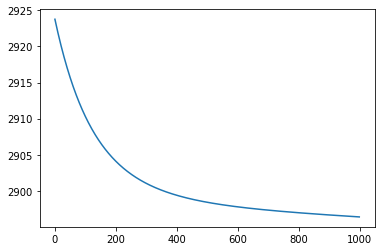

In [83]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [84]:
W, b

(array([  41.2699552 , -239.93227039,  556.01374947,  342.11368963,
        -113.43997137, -118.28530355, -209.19466006,  153.0301639 ,
         422.33303326,   60.03522651]),
 151.30267190532695)

In [85]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2883.7298826341485

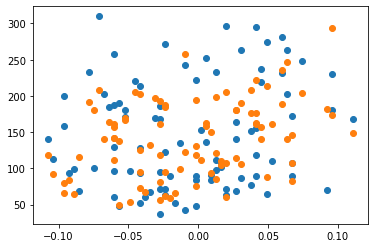

In [87]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()